# Tutorial 1: Introduction to PyTorch

![Status](https://img.shields.io/static/v1.svg?label=Status&message=Finished&color=green)

**Filled notebook:**
[![View filled on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/lkk688/DeepDataMiningLearning/blob/master/docs/notebooks/CMPE-pytorch1-2024Fall.ipynb)
[![Open filled In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lkk688/DeepDataMiningLearning/blob/master/docs/notebooks/CMPE-pytorch1-2024Fall.ipynb)       
**Author:** Kaikai Liu

## Setup Matplotlib

**Matplotlib** is a popular plotting library in  Python that provides a wide range of functionality for creating  visualizations. Install matplotlib: `pip install --upgrade matplotlib`

By default, Matplotlib generates static images of plots that need to be displayed using a separate window or saved to a file. However, there is a way to display the plots directly within the Jupyter Notebook or JupyterLab interface using the “inline” backend. Displaying the plots inline eliminates the need to open a separate window or save the plots to a file, making it faster and more convenient to view and iterate on the plots. When using the inline backend, the plots are displayed as interactive objects within the notebook, allowing users to zoom in, pan, and interact with the plots directly.

In the current versions of Jupyter Notebook, using Matplotlib inline is not necessary as plots are displayed automatically. However, it is still useful to use especially when sharing code.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

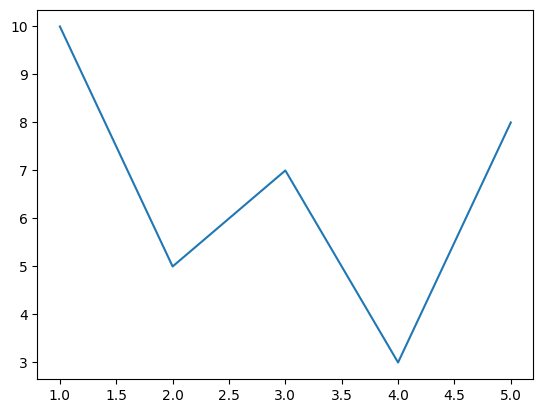

In [ ]:
x = [1, 2, 3, 4, 5]
y = [10, 5, 7, 3, 8]
plt.plot(x, y)

In [ ]:
plt.show() #nothing comes out

Producing High-Quality Figures in LaTeX Using matplotlib: https://www.alanshawn.com/tech/2022/05/16/matplotlib-latex-guide.html

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('svg')

# in newer versions of IPython, use
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')

In Jupyter Lab, the figure can be viewed in the browser and saved as SVG using the Shift+Right Click approach. In other environments, the figure can be saved as SVG using plt.savefig() with the .svg extension.

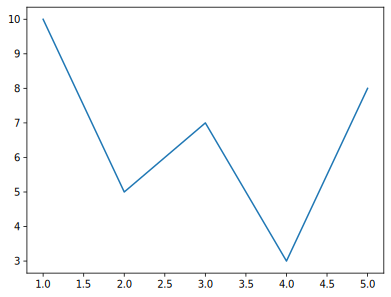

In [ ]:
x = [1, 2, 3, 4, 5]
y = [10, 5, 7, 3, 8]
plt.plot(x, y)
plt.savefig('testfigure.pdf')

## Install Pytorch

Pytorch is already installed in Colab. If you are installing the pytorch in your local machine, follow the tutorials here: from https://pytorch.org/get-started/locally/. You can check our pytorch installation tutorials for Mac/Windows/Linux/HPC here: https://deepdatamininglearning.readthedocs.io/

Click "Connect" to connect to a Colab VM instance. In Runtime->Change Runtime type to select CPU/TPU/GPU.

In [ ]:
!pip3 install torch torchvision

If the installed version of PyTorch is lower than required, uninstall it and reinstall again by running the following commands:

!pip3 uninstall --yes torch torchaudio torchvision torchtext torchdata
!pip3 install torch torchaudio torchvision torchtext torchdata

## Check PyTorch Environment

Pytorch is very similar to the `numpy` package. Let's start with importing PyTorch. The package is called `torch`, based on its original framework [Torch](http://torch.ch/). As a first step, we can check its version:

In [ ]:
!python -V

Python 3.10.12


In [ ]:
!nvidia-smi #check GPU

Sat Aug 10 20:33:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
print("Using torch", torch.__version__)

Using torch 2.3.1+cu121


In [ ]:
x = torch.rand(5, 3)
print(x)

tensor([[0.6778, 0.7837, 0.6664],
        [0.6301, 0.9998, 0.7409],
        [0.5495, 0.5978, 0.6948],
        [0.2877, 0.6407, 0.9320],
        [0.7372, 0.6757, 0.0932]])


In [ ]:
import torchvision
print(torchvision.__version__)

0.18.1+cu121


In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')  # CUDA GPU
elif torch.backends.mps.is_available():
    device = torch.device('mps') #Apple GPU
else:
    device = torch.device("cpu")

In [ ]:
print('Using device:', device)
#Additional Info when using cuda
if device.type == 'cuda':
    print("Device name: ", torch.cuda.get_device_name(0))
    print("Device properties:", torch.cuda.get_device_properties(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda
Device name:  Tesla T4
Device properties: _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [ ]:
torch.cuda.device_count()

1

In [ ]:
torch.version.cuda

'12.1'

In [ ]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
torch.backends.cudnn.version()

8906

In [ ]:
!echo $LD_LIBRARY_PATH

/usr/lib64-nvidia


As in every machine learning framework, PyTorch provides functions that are stochastic like generating random numbers. However, a very good practice is to setup your code to be reproducible with the exact same random numbers. This is why we set a seed below.

In [ ]:
torch.manual_seed(42) # Setting the seed

## Load Google Drive Folder for Colab

In Colab, add the following to load google drive folder

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import os
filename = os.path.join("/content/gdrive/My Drive/data", filename)

Check the following tutorial regarding the external data for Colab: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=XDg9OBaYqRMd

## Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices.
In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to [NumPy’s](https://numpy.org/) ndarrays, except that tensors can run on GPUs or other hardware accelerators.

Tensors and
NumPy arrays can often share the same underlying memory, eliminating the need to copy data. Tensors
are also optimized for automatic differentiation.


In [ ]:
import torch
import numpy as np

Tensors can be created directly from data. The data type is automatically inferred.

In [ ]:
# Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
scalar.ndim

0

Turn tensor from torch.Tensor to a Python integer: use the item() method

In [ ]:
# Get the Python number within a tensor (only works with one-element tensors)
scalar.item()

7

A vector is a single dimension tensor but can contain many numbers. Call `torch.Tensor` passing the desired shape as input argument:

In [ ]:
# Vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [ ]:
# Check the number of dimensions of vector
vector.ndim

1

In [ ]:
# Check shape of vector
vector.shape

torch.Size([2])

In [ ]:
vector.dtype

torch.int64

The above returns torch.Size([2]) which means our vector has a shape of [2]. This is because of the two elements we placed inside the square brackets ([7, 7]).

In PyTorch docs it is written that torch.Tensor is an alias for torch.FloatTensor. This is not the case when using torch.tensor. torch.Tensor() creates a tensor with the default data type, as defined by torch.get_default_dtype().

In [ ]:
torch.get_default_dtype()

torch.float32

In [ ]:
#change default dtype
torch.set_default_dtype(torch.float32) # default

torch.tensor infers the dtype automatically, while torch.Tensor returns a torch.FloatTensor.

In [ ]:
x = torch.Tensor(2, 3, 4)
print(x)

tensor([[[9.8019e-19, 3.3438e-41, 9.8020e-19, 3.3438e-41],
         [9.8091e-45, 0.0000e+00, 9.8019e-19, 3.3438e-41],
         [1.5891e-42, 0.0000e+00, 9.8020e-19, 3.3438e-41]],

        [[9.8091e-45, 0.0000e+00, 9.8019e-19, 3.3438e-41],
         [1.5905e-42, 0.0000e+00, 9.8020e-19, 3.3438e-41],
         [9.8091e-45, 0.0000e+00, 9.8019e-19, 3.3438e-41]]])


In [ ]:
x.dtype

torch.float32

In [ ]:
torch.Tensor([True, False]).dtype

torch.float32

In [ ]:
torch.tensor([True, False]).dtype

torch.bool

Torch defines tensor types with the following data types: https://pytorch.org/docs/stable/tensors.html

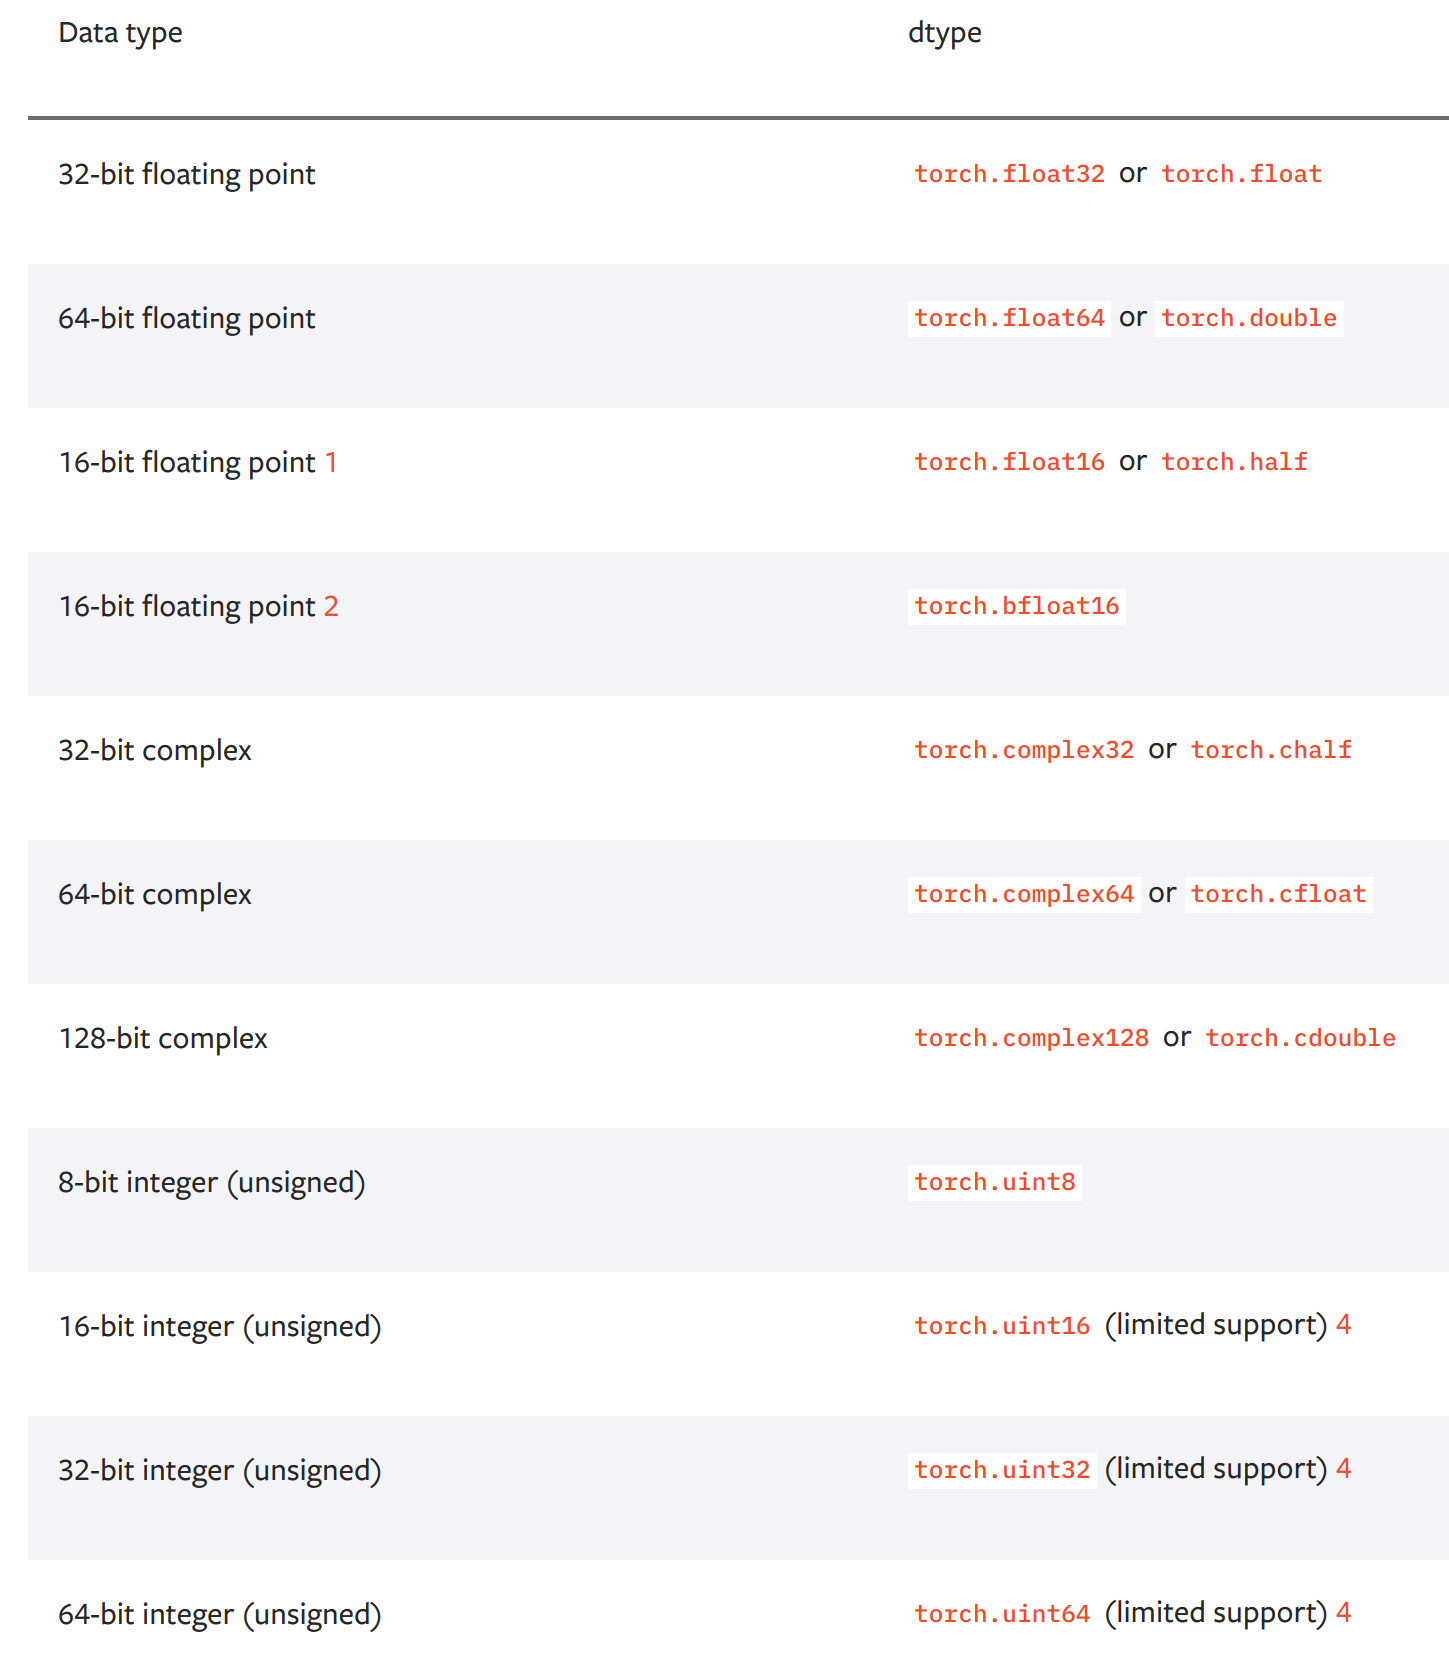

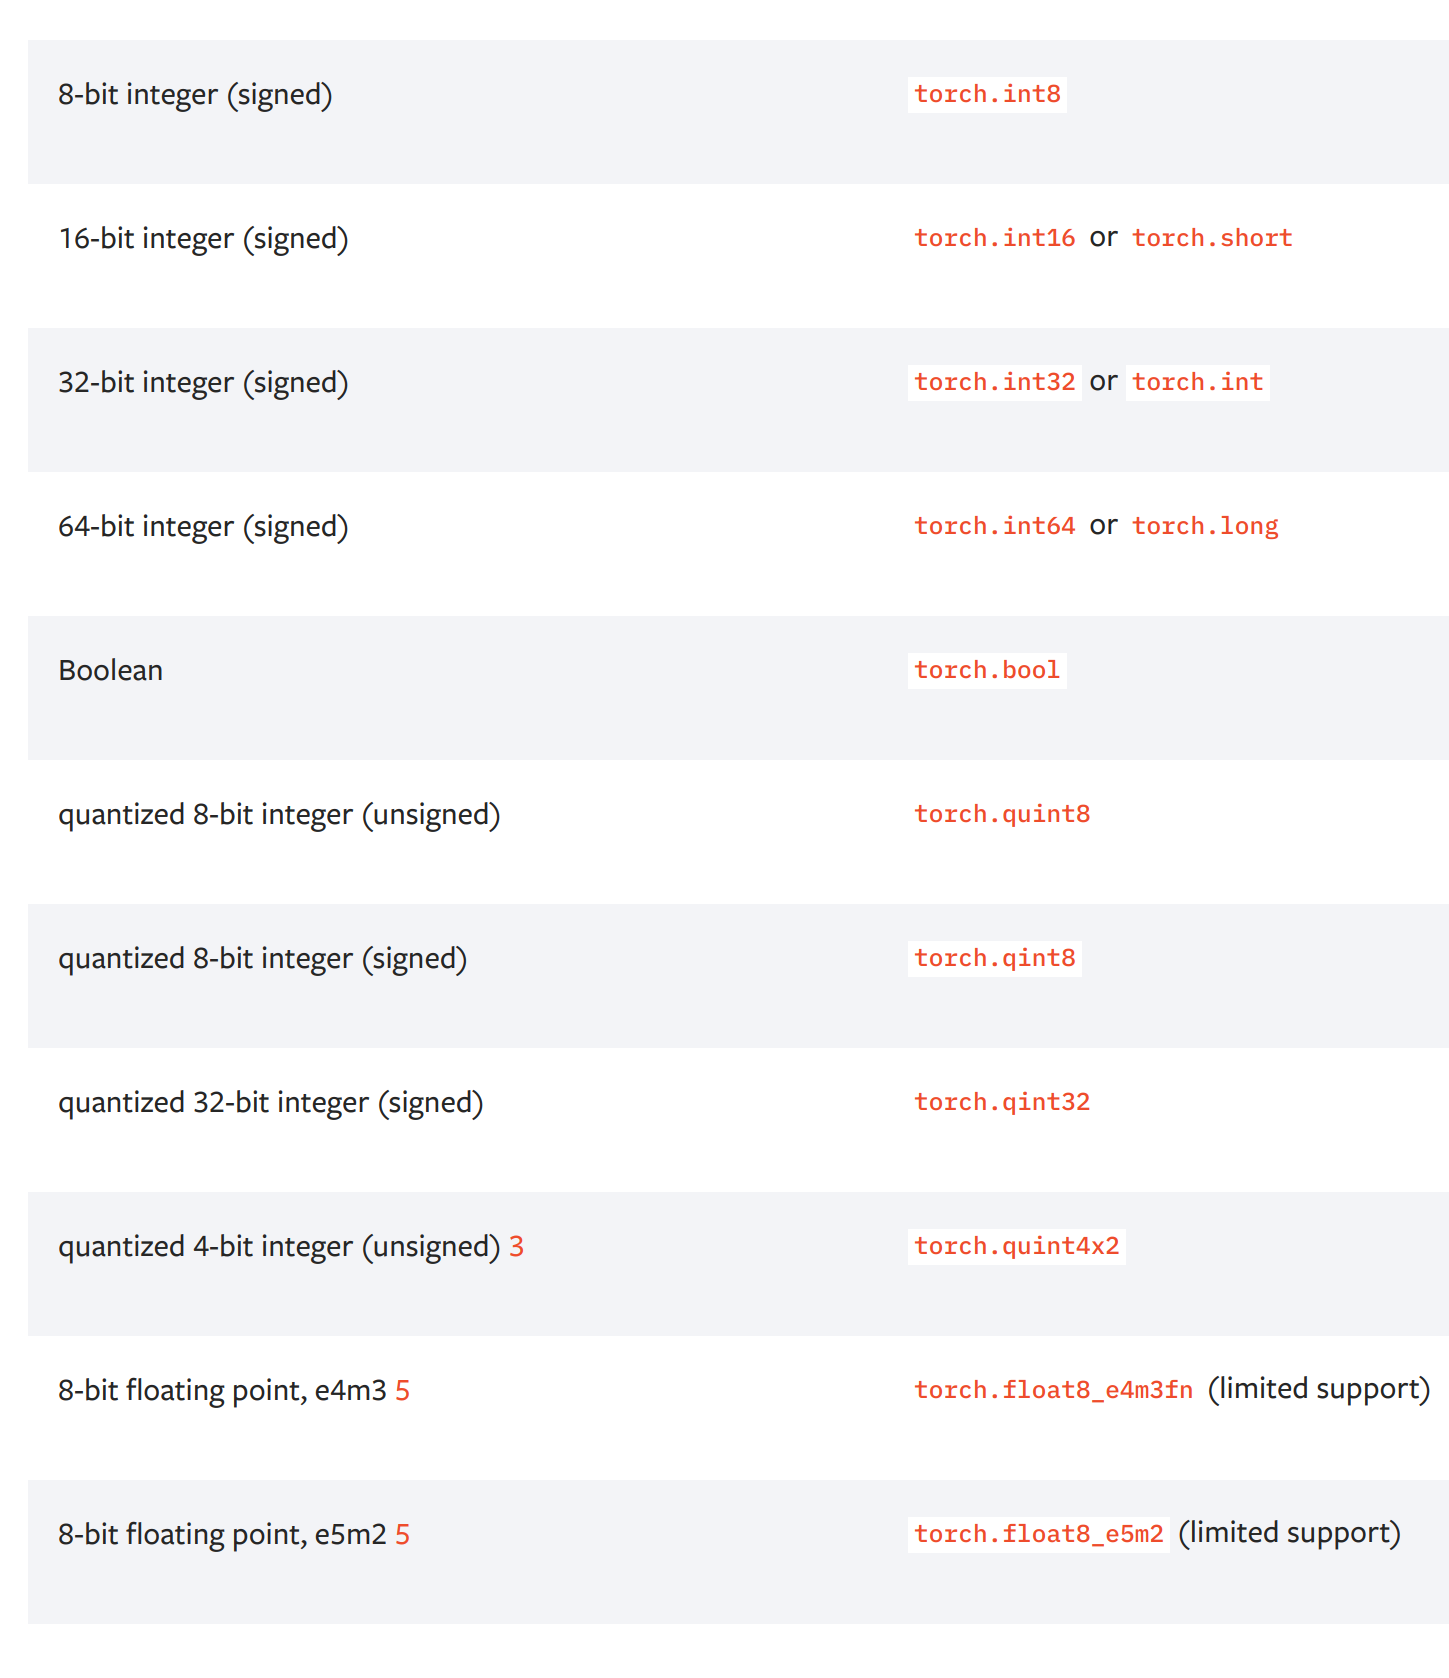

The function `torch.Tensor` allocates memory for the desired tensor, but reuses any values that have already been in the memory. To directly assign values to the tensor during initialization, there are many alternatives including:

* `torch.zeros`: Creates a tensor filled with zeros
* `torch.ones`: Creates a tensor filled with ones
* `torch.rand`: Creates a tensor with random values uniformly sampled between 0 and 1
* `torch.randn`: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1
* `torch.arange`: Creates a tensor containing the values $N,N+1,N+2,...,M$
* `torch.Tensor` (input list): Creates a tensor from the list elements you provide

In [ ]:
# Create a tensor from a (nested) list
x = torch.Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317],
         [0.1053, 0.2695, 0.3588, 0.1994]],

        [[0.5472, 0.0062, 0.9516, 0.0753],
         [0.8860, 0.5832, 0.3376, 0.8090],
         [0.5779, 0.9040, 0.5547, 0.3423]]])


You can obtain the shape of a tensor in the same way as in numpy (`x.shape`), or using the `.size` method:

In [ ]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


You can tell the number of dimensions a tensor in PyTorch has by the number of square brackets on the outside ([) and you only need to count one side.

In [ ]:
#Initializing a Tensor
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)#direct from data

In [ ]:
x_data.ndim

2

In [ ]:
x_data.shape

torch.Size([2, 2])

In [ ]:
x_data.type()

'torch.LongTensor'

In [ ]:
torch.is_tensor(x_data)

True

In [ ]:
# Create a tensor and check its datatype
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

In [ ]:
tensor

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.])

we'll create another tensor the same as before but change its datatype to torch.float16.

In [ ]:
# Create a float16 tensor
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

In [ ]:
# Create a int8 tensor
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

## Tensors and NumPy Arrays

Tensors can be converted to numpy arrays, and numpy arrays back to tensors. To transform a numpy array into a tensor, we can use the function `torch.from_numpy`:

In [ ]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])


To transform a PyTorch tensor back to a numpy array, we can use the function `.numpy()` on tensors:

The conversion of tensors to numpy require the tensor to be on the CPU, and not the GPU (more on GPU support in a later section). In case you have a tensor on GPU, you need to call `.cpu()` on the tensor beforehand. Hence, you get a line like `np_arr = tensor.cpu().numpy()`.

In [ ]:
tensor.numpy() #convert tensor back to numpy

array([[1, 2],
       [3, 4]])

Most operations that exist in numpy, also exist in PyTorch. A full list of operations can be found in the [PyTorch documentation](https://pytorch.org/docs/stable/tensors.html#), but we will review the most important ones here.

The simplest operation is to add two tensors:

In [ ]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.6343, 0.3644, 0.7104],
        [0.9464, 0.7890, 0.2814]])
X2 tensor([[0.7886, 0.5895, 0.7539],
        [0.1952, 0.0050, 0.3068]])
Y tensor([[1.4230, 0.9539, 1.4643],
        [1.1417, 0.7941, 0.5882]])


Calling `x1 + x2` creates a new tensor containing the sum of the two inputs. However, we can also use in-place operations that are applied directly on the memory of a tensor. We therefore change the values of `x2` without the chance to re-accessing the values of `x2` before the operation. An example is shown below:

In [ ]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)

In-place operations are usually marked with a underscore postfix (e.g. "add_" instead of "add").

Another common operation aims at changing the shape of a tensor. A tensor of size (2,3) can be re-organized to any other shape with the same number of elements (e.g. a tensor of size (6), or (3,2), ...). In PyTorch, this operation is called `view`:

In [ ]:
x = torch.arange(6)
print("X", x)

X tensor([0, 1, 2, 3, 4, 5])


In [ ]:
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [ ]:
x = x.permute(1, 0) # Swapping dimension 0 and 1
print("X", x)

X tensor([[0, 3],
        [1, 4],
        [2, 5]])


Other commonly used operations include matrix multiplications, which are essential for neural networks. Quite often, we have an input vector $\mathbf{x}$, which is transformed using a learned weight matrix $\mathbf{W}$. There are multiple ways and functions to perform matrix multiplication, some of which we list below:

* `torch.matmul`: Performs the matrix product over two tensors, where the specific behavior depends on the dimensions. If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product. For higher dimensional inputs, the function supports broadcasting (for details see the [documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)). Can also be written as `a @ b`, similar to numpy.
* `torch.mm`: Performs the matrix product over two matrices, but doesn't support broadcasting (see [documentation](https://pytorch.org/docs/stable/generated/torch.mm.html?highlight=torch%20mm#torch.mm))
* `torch.bmm`: Performs the matrix product with a support batch dimension. If the first tensor $T$ is of shape ($b\times n\times m$), and the second tensor $R$ ($b\times m\times p$), the output $O$ is of shape ($b\times n\times p$), and has been calculated by performing $b$ matrix multiplications of the submatrices of $T$ and $R$: $O_i = T_i @ R_i$
* `torch.einsum`: Performs matrix multiplications and more (i.e. sums of products) using the Einstein summation convention. Explanation of the Einstein sum can be found in assignment 1.

Usually, we use `torch.matmul` or `torch.bmm`. We can try a matrix multiplication with `torch.matmul` below.

In [ ]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [ ]:
W = torch.arange(9).view(3, 3) # We can also stack multiple operations in a single line
print("W", W)

W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [ ]:
h = torch.matmul(x, W) # Verify the result by calculating it by hand too!
print("h", h)

h tensor([[15, 18, 21],
        [42, 54, 66]])


## High Dimension Tensor

In [ ]:
# Tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [ ]:
# Check number of dimensions for TENSOR
TENSOR.ndim

3

In [ ]:
# Check shape of TENSOR
TENSOR.shape

torch.Size([1, 3, 3])

The dimensions go outer to inner.

That means there's 1 dimension of 3 by 3.

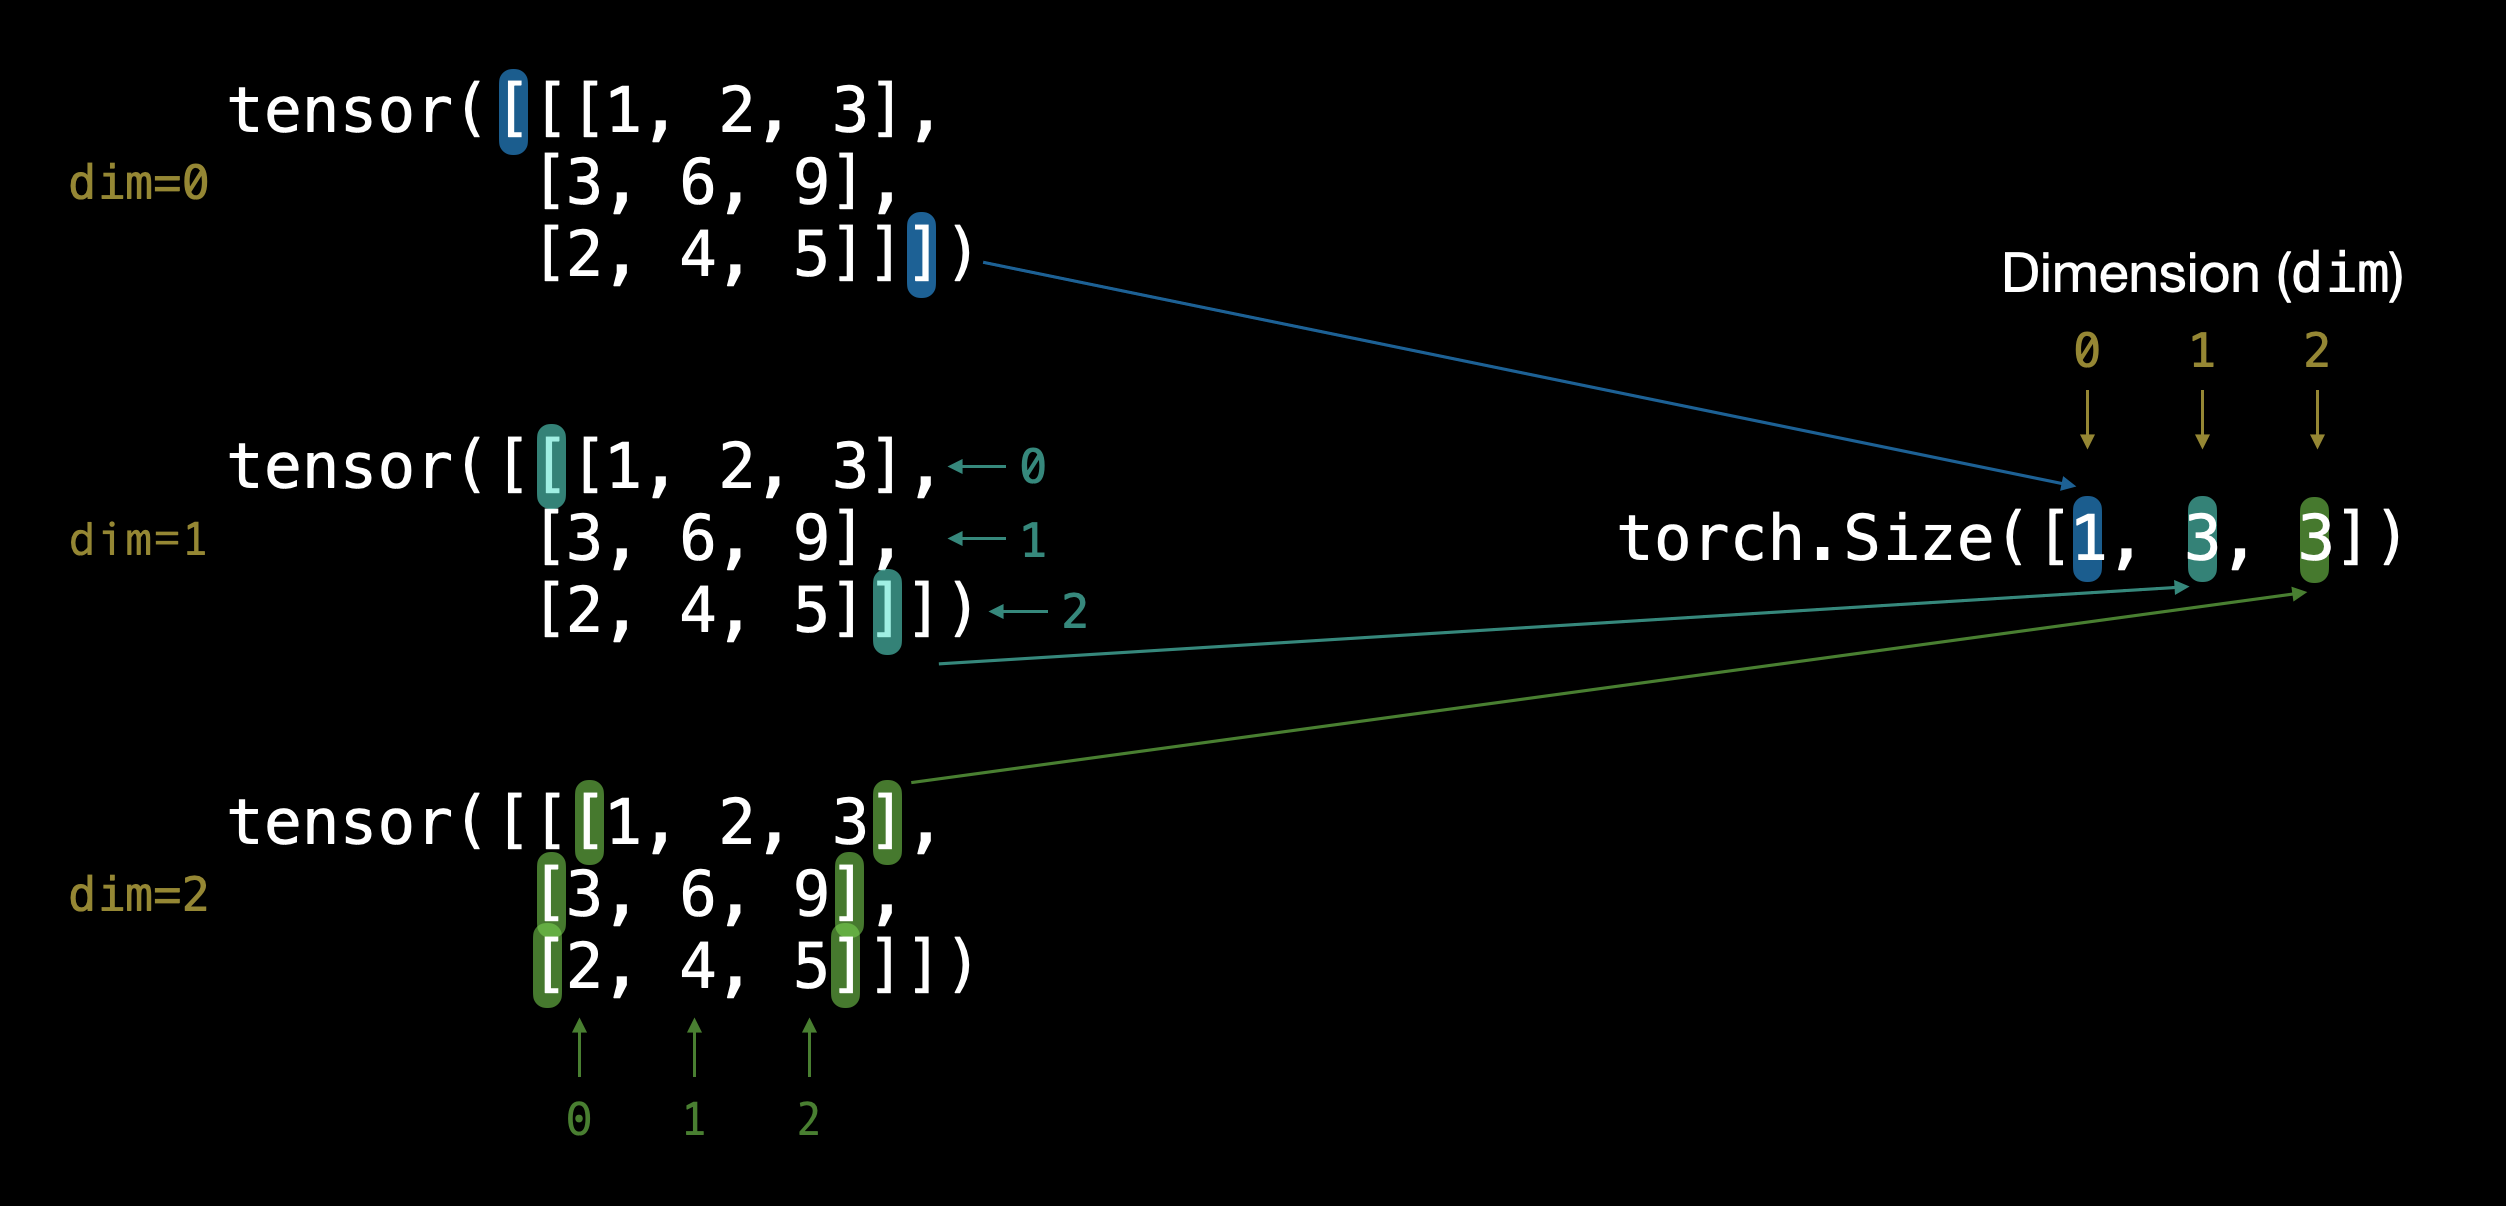

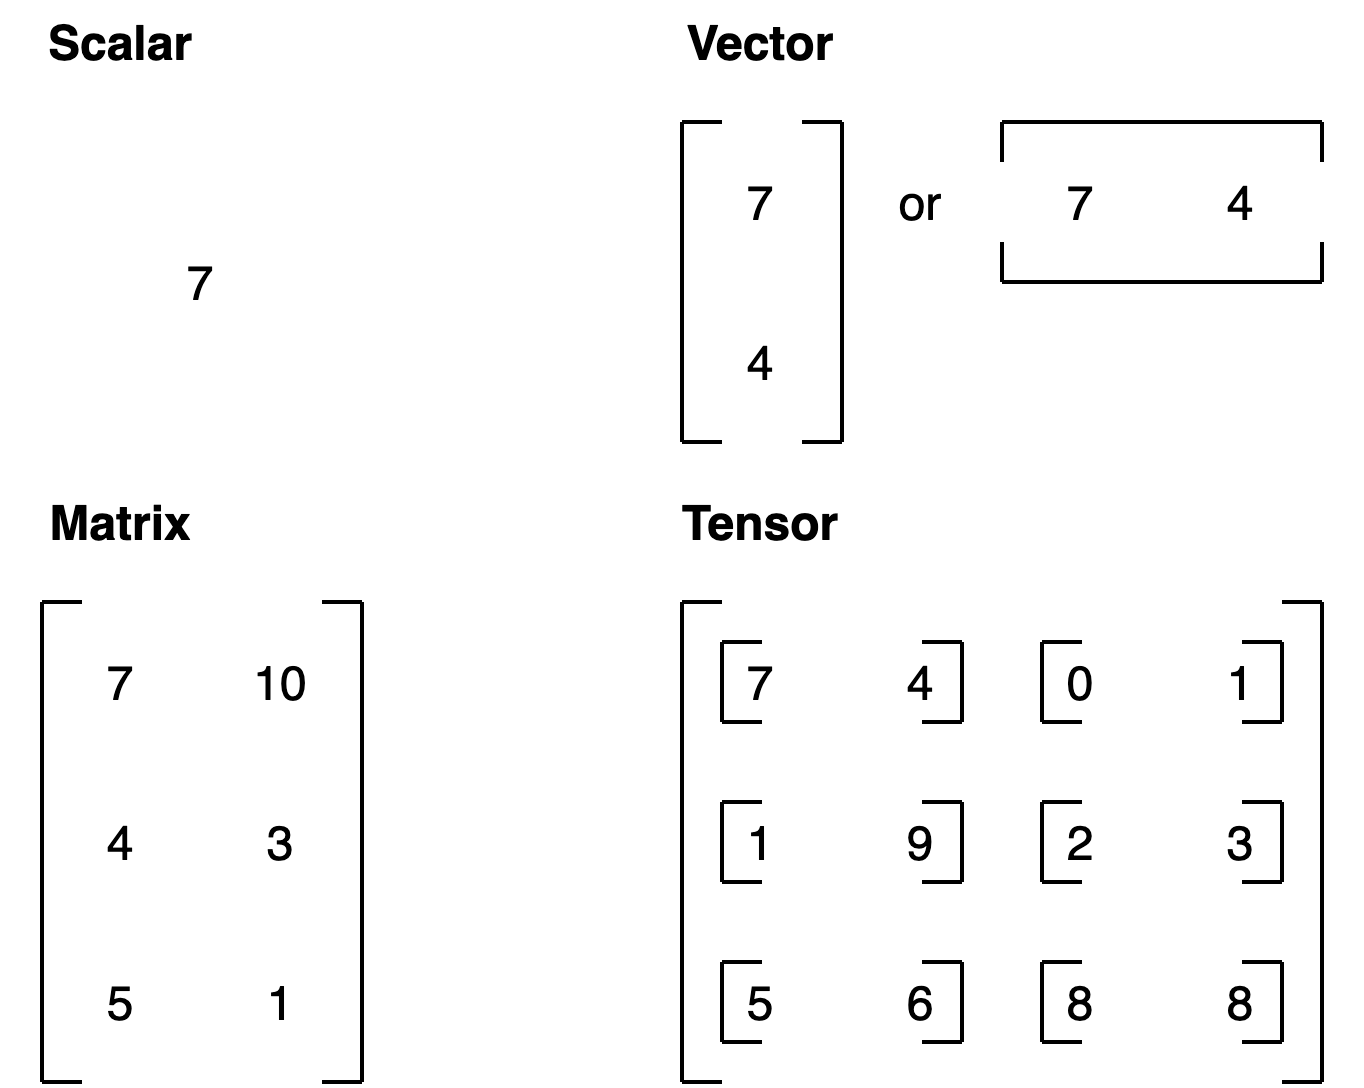

TORCH.ONES_LIKE: Returns a tensor filled with the scalar value 1, with the same size as input

In [ ]:
#From another tensor:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.8823, 0.9150],
        [0.3829, 0.9593]]) 



In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

In [ ]:
tensor_device = tensor.to(device) #same to to('cuda')

In [ ]:
tensor

tensor([[0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936],
        [0.8694, 0.5677, 0.7411, 0.4294]], device='cuda:0')

In [ ]:
tensor_cpu = tensor.cpu() #move back to CPU

In [ ]:
print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0


In [ ]:
print(f"Device tensor is stored on: {tensor_cpu.device}")

Device tensor is stored on: cpu


In [ ]:
torch.numel(tensor) #Returns the total number of elements in the input tensor.

12

In [ ]:
tensor.data_ptr()

132973884080128

In [ ]:
tensor_cpu.data_ptr()

102487087064704

In [ ]:
newtensor=tensor
tensor.data_ptr() == newtensor.data_ptr()

True

In [ ]:
newtensor=tensor.clone() #Returns a copy of input.
tensor.data_ptr() == newtensor.data_ptr()

False

In [ ]:
testdata = torch.tensor([[0.11111, 0.222222, 0.3333333]],
             dtype=torch.float64,
             device=torch.device('cuda:0'))  # creates a double tensor on a CUDA device

In [ ]:
testdata

tensor([[0.1111, 0.2222, 0.3333]], device='cuda:0', dtype=torch.float64)

In [ ]:
torch.tensor(3.14159)  # Create a zero-dimensional (scalar) tensor

tensor(3.1416)

In [ ]:
torch.tensor([])  # Create an empty tensor (of size (0,))

tensor([])

## Standard numpy-like indexing and slicing:

We often have the situation where we need to select a part of a tensor. Indexing works just like in numpy, so let's try it:

In [ ]:
x = torch.arange(12).view(3, 4)
print("X", x)

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [ ]:
print(x[:, 1])   # Second column

tensor([1, 5, 9])


In [ ]:
print(x[0])      # First row

tensor([0, 1, 2, 3])


In [ ]:
print(x[:2, -1]) # First two rows, last column

tensor([3, 7])


In [ ]:
print(x[1:3, :]) # Middle two rows

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [ ]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


TORCH.ARANGE: (start, end, step): with values from the interval [start, end) https://pytorch.org/docs/stable/generated/torch.arange.html#torch.arange

In [ ]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [ ]:
torch.arange(1, 4)

tensor([1, 2, 3])

In [ ]:
torch.arange(1, 2.5, 0.5)

tensor([1.0000, 1.5000, 2.0000])

torch.linspace(start, end, steps): Creates a one-dimensional tensor of size steps whose values are evenly spaced from start to end, inclusive.
https://pytorch.org/docs/stable/generated/torch.linspace.html#torch.linspace

In [ ]:
torch.linspace(3, 10, steps=5)

tensor([ 3.0000,  4.7500,  6.5000,  8.2500, 10.0000])

In [ ]:
torch.linspace(-10, 10, steps=5)

tensor([-10.,  -5.,   0.,   5.,  10.])

In [ ]:
torch.linspace(start=-10, end=10, steps=5)

tensor([-10.,  -5.,   0.,   5.,  10.])

In [ ]:
torch.linspace(start=-10, end=10, steps=1)

tensor([-10.])

torch.eye(n, m=None): Returns a 2-D tensor with ones on the diagonal and zeros elsewhere.

In [ ]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [ ]:
torch.eye(3,2)

tensor([[1., 0.],
        [0., 1.],
        [0., 0.]])

torch.full(size, fill_value): Creates a tensor of size size filled with fill_value. The tensor’s dtype is inferred from fill_value.

In [ ]:
torch.full((2, 3), 3.141592)

tensor([[3.1416, 3.1416, 3.1416],
        [3.1416, 3.1416, 3.1416]])

## Indexing, Slicing, Joining, Mutating Ops

Indexing (selecting data from tensors)

In [ ]:
# Create a tensor
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

Indexing values goes outer dimension -> inner dimension (check out the square brackets).

In [ ]:
# Let's index bracket by bracket
print(f"First square bracket:\n{x[0]}")
print(f"Second square bracket: {x[0][0]}")
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


You can also use : to specify "all values in this dimension" and then use a comma (,) to add another dimension.

In [ ]:
# Get all values of 0th dimension and the 0 index of 1st dimension
x[:, 0]

tensor([[1, 2, 3]])

In [ ]:
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [ ]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [ ]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0, 0, :] # same as x[0][0]

tensor([1, 2, 3])

Joining tensors via cat: https://pytorch.org/docs/stable/generated/torch.cat.html
dim: the dimension over which the tensors are concatenated

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [ ]:
x = torch.randn(2, 3)
x1=torch.cat((x, x, x), 0)
x2=torch.cat((x, x, x), 1)

In [ ]:
x1.shape

torch.Size([6, 3])

In [ ]:
x2.shape

torch.Size([2, 9])

In [ ]:
x3=torch.cat((x, x, x))
x3.shape

torch.Size([6, 3])

Creates a new tensor by horizontally stacking the tensors in tensors.

In [ ]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
torch.column_stack((a, b))

tensor([[1, 4],
        [2, 5],
        [3, 6]])

In [ ]:
b = torch.arange(10).reshape(5, 2)
b

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [ ]:
a = torch.arange(5)
torch.column_stack((a, b, b))

tensor([[0, 0, 1, 0, 1],
        [1, 2, 3, 2, 3],
        [2, 4, 5, 4, 5],
        [3, 6, 7, 6, 7],
        [4, 8, 9, 8, 9]])

Stack tensors in sequence horizontally (column wise).

In [ ]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
c = torch.hstack((a,b))
c

tensor([1, 2, 3, 4, 5, 6])

In [ ]:
c.shape

torch.Size([6])

In [ ]:
a = torch.tensor([[1],[2],[3]])
b = torch.tensor([[4],[5],[6]])
a.shape

torch.Size([3, 1])

In [ ]:
c = torch.hstack((a,b))
c

tensor([[1, 4],
        [2, 5],
        [3, 6]])

In [ ]:
c.shape

torch.Size([3, 2])

Stack tensors in sequence depthwise (along third axis).

In [ ]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
c = torch.dstack((a,b))
c

tensor([[[1, 4],
         [2, 5],
         [3, 6]]])

In [ ]:
c.shape

torch.Size([1, 3, 2])

In [ ]:
a = torch.tensor([[1],[2],[3]])
b = torch.tensor([[4],[5],[6]])
a.shape

torch.Size([3, 1])

In [ ]:
c=torch.dstack((a,b))
c

tensor([[[1, 4]],

        [[2, 5]],

        [[3, 6]]])

In [ ]:
c.shape

torch.Size([3, 1, 2])

torch.vstack(tensors, *, out=None): Stack tensors in sequence vertically (row wise).

In [ ]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
c = torch.vstack((a,b))
c

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
c.shape

torch.Size([2, 3])

In [ ]:
a = torch.tensor([[1],[2],[3]])
b = torch.tensor([[4],[5],[6]])
a.shape

torch.Size([3, 1])

In [ ]:
c = torch.vstack((a,b))

In [ ]:
c.shape

torch.Size([6, 1])

torch.stack(tensors, dim=0, *, out=None): Concatenates a sequence of tensors along a new dimension.

In [ ]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
c = torch.stack((a,b))

In [ ]:
c = torch.stack((a,b), dim=0)
c

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
c.shape

torch.Size([2, 3])

In [ ]:
c = torch.stack((a,b), dim=1)
c

tensor([[1, 4],
        [2, 5],
        [3, 6]])

In [ ]:
c.shape

torch.Size([3, 2])

torch.transpose(input, dim0, dim1): Returns a tensor that is a transposed version of input. The given dimensions dim0 and dim1 are swapped.

In [ ]:
x = torch.randn(2, 3)
x

tensor([[ 0.1576,  0.7379,  2.9722],
        [-1.2081, -0.8390,  1.5899]])

In [ ]:
torch.transpose(x, 0, 1)

tensor([[ 0.1576, -1.2081],
        [ 0.7379, -0.8390],
        [ 2.9722,  1.5899]])

In [ ]:
torch.t(x) #transposes dimensions 0 and 1

tensor([[ 0.1576, -1.2081],
        [ 0.7379, -0.8390],
        [ 2.9722,  1.5899]])

torch.tile(input, dims): Constructs a tensor by repeating the elements of input. The dims argument specifies the number of repetitions in each dimension.

In [ ]:
x = torch.tensor([1, 2, 3])
y = x.tile((2,))
y.shape

torch.Size([6])

In [ ]:
y

tensor([1, 2, 3, 1, 2, 3])

In [ ]:
y = x.tile((2))

In [ ]:
y

tensor([1, 2, 3, 1, 2, 3])

In [ ]:
y = x.t().tile((2))
y

tensor([1, 2, 3, 1, 2, 3])

In [ ]:
y = torch.tensor([[1, 2], [3, 4]])
y

tensor([[1, 2],
        [3, 4]])

In [ ]:
yy = torch.tile(y, (2, 2))

In [ ]:
yy.shape

torch.Size([4, 4])

In [ ]:
yy

tensor([[1, 2, 1, 2],
        [3, 4, 3, 4],
        [1, 2, 1, 2],
        [3, 4, 3, 4]])

Often times you'll want to reshape or change the dimensions of your tensors without actually changing the values inside them.

To do so, some popular methods are:

| Method | One-line description |
| ----- | ----- |
| [`torch.reshape(input, shape)`](https://pytorch.org/docs/stable/generated/torch.reshape.html#torch.reshape) | Reshapes `input` to `shape` (if compatible), can also use `torch.Tensor.reshape()`. |
| [`Tensor.view(shape)`](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html) | Returns a view of the original tensor in a different `shape` but shares the same data as the original tensor. |
| [`torch.stack(tensors, dim=0)`](https://pytorch.org/docs/1.9.1/generated/torch.stack.html) | Concatenates a sequence of `tensors` along a new dimension (`dim`), all `tensors` must be same size. |
| [`torch.squeeze(input)`](https://pytorch.org/docs/stable/generated/torch.squeeze.html) | Squeezes `input` to remove all the dimenions with value `1`. |
| [`torch.unsqueeze(input, dim)`](https://pytorch.org/docs/1.9.1/generated/torch.unsqueeze.html) | Returns `input` with a dimension value of `1` added at `dim`. |
| [`torch.permute(input, dims)`](https://pytorch.org/docs/stable/generated/torch.permute.html) | Returns a *view* of the original `input` with its dimensions permuted (rearranged) to `dims`. |

torch.permute(input, dims): Returns a view of the original tensor input with its dimensions permuted.

In [ ]:
x = torch.randn(2, 3, 5)
x.size()

torch.Size([2, 3, 5])

In [ ]:
torch.permute(x, (2, 0, 1)).size()

torch.Size([5, 2, 3])

torch.reshape(input, shape): Returns a tensor with the same data and number of elements as input, but with the specified shape.

In [ ]:
a = torch.arange(4.)
a

tensor([0., 1., 2., 3.])

In [ ]:
c = torch.reshape(a, (2, 2))
c

tensor([[0., 1.],
        [2., 3.]])

In [ ]:
c.shape

torch.Size([2, 2])

In [ ]:
b = torch.tensor([[0, 1], [2, 3]])
b

tensor([[0, 1],
        [2, 3]])

In [ ]:
c = torch.reshape(b, (-1,))
c

tensor([0, 1, 2, 3])

In [ ]:
c.shape

torch.Size([4])

In [ ]:
# Create a tensor
import torch
x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

In [ ]:
# Add an extra dimension
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

We can also change the view with torch.view().

In [ ]:
# Change view (keeps same data as original but changes view)
# See more: https://stackoverflow.com/a/54507446/7900723
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

Remember though, changing the view of a tensor with `torch.view()` really only creates a new view of the *same* tensor.

So changing the view changes the original tensor too.

In [ ]:
# Changing z changes x
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))

torch.select(input, dim, index): Slices the input tensor along the selected dimension at the given index. This function returns a view of the original tensor with the given dimension removed.

select() is equivalent to slicing. For example, tensor.select(0, index) is equivalent to tensor[index] and tensor.select(2, index) is equivalent to tensor[:,:,index].



In [ ]:
b = torch.tensor([[0, 1], [2, 3]])
b

tensor([[0, 1],
        [2, 3]])

In [ ]:
torch.select(b, dim=0, index=0)

tensor([0, 1])

In [ ]:
torch.select(b, dim=0, index=1)

tensor([2, 3])

In [ ]:
torch.select(b, dim=1, index=0)

tensor([0, 2])

torch.split(tensor, split_size_or_sections, dim=0): Splits the tensor into chunks. Each chunk is a view of the original tensor.

In [ ]:
a = torch.arange(10).reshape(5, 2)
a

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [ ]:
torch.split(a, 2)

(tensor([[0, 1],
         [2, 3]]),
 tensor([[4, 5],
         [6, 7]]),
 tensor([[8, 9]]))

In [ ]:
torch.split(a, [1, 4])

(tensor([[0, 1]]),
 tensor([[2, 3],
         [4, 5],
         [6, 7],
         [8, 9]]))

torch.squeeze(input, dim=None): Returns a tensor with all specified dimensions of input of size 1 removed.

In [ ]:
x = torch.zeros(2, 1, 2, 1, 2)
x.size()

torch.Size([2, 1, 2, 1, 2])

In [ ]:
y = torch.squeeze(x)
y.size()

torch.Size([2, 2, 2])

In [ ]:
y = torch.squeeze(x, 0)
y.size()

torch.Size([2, 1, 2, 1, 2])

In [ ]:
y = torch.squeeze(x, 1)
y.size()

torch.Size([2, 2, 1, 2])

In [ ]:
y = torch.squeeze(x, (1, 2, 3))
y.size()

torch.Size([2, 2, 2])

torch.unsqueeze(input, dim): Returns a new tensor with a dimension of size one inserted at the specified position.

In [ ]:
x = torch.tensor([1, 2, 3, 4])
y = torch.unsqueeze(x, 0)
y

tensor([[1, 2, 3, 4]])

In [ ]:
y.shape

torch.Size([1, 4])

In [ ]:
yy=torch.unsqueeze(x, 1)
yy

tensor([[1],
        [2],
        [3],
        [4]])

In [ ]:
yy.shape

torch.Size([4, 1])

torch.where(condition, input, other, *, out=None): Return a tensor of elements selected from either input or other, depending on condition.

In [ ]:
x = torch.randn(3, 2)

In [ ]:
x

tensor([[ 0.0573, -0.5208],
        [-0.0492,  1.8426],
        [ 1.4490, -0.3444]])

In [ ]:
torch.where(x > 0, 1.0, 0.0)

tensor([[1., 0.],
        [0., 1.],
        [1., 0.]])

In [ ]:
x = torch.randn(2, 2, dtype=torch.double)
x

tensor([[ 0.9677, -0.0256],
        [-0.4214,  0.9832]], dtype=torch.float64)

In [ ]:
torch.where(x > 0, x, 0.)

tensor([[0.9677, 0.0000],
        [0.0000, 0.9832]], dtype=torch.float64)

In [ ]:
a = torch.empty(3, 3).uniform_(0, 1) # generate a uniform random matrix with range [0, 1]

In [ ]:
a

tensor([[0.2532, 0.7874, 0.0907],
        [0.4240, 0.5694, 0.6346],
        [0.0218, 0.5018, 0.1395]])

torch.bernoulli(input, *, generator=None, out=None): Draws binary random numbers (0 or 1) from a Bernoulli distribution. The input tensor should be a tensor containing probabilities to be used for drawing the binary random number. Hence, all values in input have to be in the range.

In [ ]:
torch.bernoulli(a)

tensor([[0., 1., 0.],
        [0., 1., 1.],
        [0., 1., 0.]])

## Tensors to GPU

A crucial feature of PyTorch is the support of GPUs, short for Graphics Processing Unit. A GPU can perform many thousands of small operations in parallel, making it very well suitable for performing large matrix operations in neural networks.

CPUs and GPUs have both different advantages and disadvantages, which is why many computers contain both components and use them for different tasks. GPUs can accelerate the training of your network up to a factor of $100$ which is essential for large neural networks. PyTorch implements a lot of functionality for supporting GPUs (mostly those of NVIDIA due to the libraries [CUDA](https://developer.nvidia.com/cuda-zone) and [cuDNN](https://developer.nvidia.com/cudnn)). First, let's check whether you have a GPU available:

In [ ]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? True


If you have a GPU on your computer but the command above returns False, make sure you have the correct CUDA-version installed. On Google Colab, make sure that you have selected a GPU in your runtime setup (in the menu, check under `Runtime -> Change runtime type`).

By default, all tensors you create are stored on the CPU. We can push a tensor to the GPU by using the function `.to(...)`, or `.cuda()`. However, it is often a good practice to define a `device` object in your code which points to the GPU if you have one, and otherwise to the CPU. Then, you can write your code with respect to this device object, and it allows you to run the same code on both a CPU-only system, and one with a GPU. Let's try it below. We can specify the device as follows:

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


You can put tensors (and models, we'll see this later) on a specific device by calling [`to(device)`](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html) on them. Where `device` is the target device you'd like the tensor (or model) to go to.

GPUs offer far faster numerical computing than CPUs do and if a GPU isn't available, because of our **device agnostic code** (see above), it'll run on the CPU.

> **Note:** Putting a tensor on GPU using `to(device)` (e.g. `some_tensor.to(device)`) returns a copy of that tensor, e.g. the same tensor will be on CPU and GPU. To overwrite tensors, reassign them:
>
> `some_tensor = some_tensor.to(device)`


In [ ]:
# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='cuda:0')

In case you have a GPU, you should now see the attribute `device='cuda:0'` being printed next to your tensor. The second tensor has `device='cuda:0'`, this means it's stored on the 0th GPU available (GPUs are 0 indexed, if two GPUs were available, they'd be `'cuda:0'` and `'cuda:1'` respectively, up to `'cuda:n'`).

PyTorch also supports multi-GPU systems, but this you will only need once you have very big networks to train (if interested, see the [PyTorch documentation](https://pytorch.org/docs/stable/distributed.html#distributed-basics)). We can also compare the runtime of a large matrix multiplication on the CPU with a operation on the GPU:

Moving tensors back to the CPU

In [ ]:
# If tensor is on GPU, can't transform it to NumPy (this will error)
#tensor_on_gpu.numpy()
#Instead, to get a tensor back to CPU and usable with NumPy we can use Tensor.cpu()
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

The above returns a copy of the GPU tensor in CPU memory so the original tensor is still on GPU.

In [ ]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

In [ ]:
tensor_back_on_cpu[0] = 10
tensor_back_on_cpu

array([10,  2,  3])

In [ ]:
tensor_on_gpu #independent to the CPU value

tensor([1, 2, 3], device='cuda:0')

In [ ]:
import time
x = torch.randn(5000, 5000)

## CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

## GPU version
x = x.to(device)
_ = torch.matmul(x, x)  # First operation to 'burn in' GPU
# CUDA is asynchronous, so we need to use different timing functions
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x, x)
end.record()
torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

CPU time: 3.30275s
GPU time: 0.08646s


Depending on the size of the operation and the CPU/GPU in your system, the speedup of this operation can be >50x. As `matmul` operations are very common in neural networks, we can already see the great benefit of training a NN on a GPU. The time estimate can be relatively noisy here because we haven't run it for multiple times. Feel free to extend this, but it also takes longer to run.

When generating random numbers, the seed between CPU and GPU is not synchronized. Hence, we need to set the seed on the GPU separately to ensure a reproducible code. Note that due to different GPU architectures, running the same code on different GPUs does not guarantee the same random numbers. Still, we don't want that our code gives us a different output every time we run it on the exact same hardware. Hence, we also set the seed on the GPU:

In [ ]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## Reproducibility

if you wanted to created two random tensors with the same values.

[`torch.manual_seed(seed)`](https://pytorch.org/docs/stable/generated/torch.manual_seed.html): `seed` is an integer (like `42` but it could be anything) that flavours the randomness.

In [ ]:
import random

# # Set the random seed
RANDOM_SEED=42 # try changing this to different values and see what happens to the numbers below
torch.manual_seed(seed=RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called
# Without this, tensor_D would be different to tensor_C
torch.random.manual_seed(seed=RANDOM_SEED) # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

## Save Load Tensor

In [ ]:
# Save to file
x = torch.tensor([0, 1, 2, 3, 4])
torch.save(x, 'tensor.pt')

In [ ]:
!ls

sample_data  tensor.pt


In [ ]:
!pwd

/content


In [ ]:
y = torch.load('tensor.pt', map_location=torch.device('cpu'), weights_only=True)

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
y

tensor([0, 1, 2, 3, 4])

In [ ]:
# Load all tensors onto the CPU, using a function
y = torch.load('tensor.pt', map_location=lambda storage, loc: storage, weights_only=True)
y

tensor([0, 1, 2, 3, 4])

In [ ]:
# Load all tensors onto GPU 1
y = torch.load('tensor.pt', map_location=lambda storage, loc: storage.cuda(0), weights_only=True)
y

tensor([0, 1, 2, 3, 4], device='cuda:0')

## Dynamic Computation Graph and Backpropagation

One of the main reasons for using PyTorch in Deep Learning projects is that we can automatically get **gradients/derivatives** of functions that we define. We will mainly use PyTorch for implementing neural networks, and they are just fancy functions. If we use weight matrices in our function that we want to learn, then those are called the **parameters** or simply the **weights**.

If our neural network would output a single scalar value, we would talk about taking the **derivative**, but you will see that quite often we will have **multiple** output variables ("values"); in that case we talk about **gradients**. It's a more general term.

Given an input $\mathbf{x}$, we define our function by **manipulating** that input, usually by matrix-multiplications with weight matrices and additions with so-called bias vectors. As we manipulate our input, we are automatically creating a **computational graph**. This graph shows how to arrive at our output from our input.
PyTorch is a **define-by-run** framework; this means that we can just do our manipulations, and PyTorch will keep track of that graph for us. Thus, we create a dynamic computation graph along the way.

So, to recap: the only thing we have to do is to compute the **output**, and then we can ask PyTorch to automatically get the **gradients**.

> **Note:  Why do we want gradients?** Consider that we have defined a function, a neural net, that is supposed to compute a certain output $y$ for an input vector $\mathbf{x}$. We then define an **error measure** that tells us how wrong our network is; how bad it is in predicting output $y$ from input $\mathbf{x}$. Based on this error measure, we can use the gradients to **update** the weights $\mathbf{W}$ that were responsible for the output, so that the next time we present input $\mathbf{x}$ to our network, the output will be closer to what we want.

The first thing we have to do is to specify which tensors require gradients. By default, when we create a tensor, it does not require gradients.

In [ ]:
x = torch.ones((3,))
print(x.requires_grad)

False


We can change this for an existing tensor using the function `requires_grad_()` (underscore indicating that this is a in-place operation). Alternatively, when creating a tensor, you can pass the argument `requires_grad=True` to most initializers we have seen above.

In [ ]:
x.requires_grad_(True)
print(x.requires_grad)

True


In order to get familiar with the concept of a computation graph, we will create one for the following function:

$$y = \frac{1}{\ell(x)}\sum_i \left[(x_i + 2)^2 + 3\right],$$

where we use $\ell(x)$ to denote the number of elements in $x$. In other words, we are taking a mean here over the operation within the sum. You could imagine that $x$ are our parameters, and we want to optimize (either maximize or minimize) the output $y$. For this, we want to obtain the gradients $\partial y / \partial \mathbf{x}$. For our example, we'll use $\mathbf{x}=[0,1,2]$ as our input.

In [ ]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


In [ ]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


we have created a computation graph that looks similar to the figure below:

pytorch_computation_graph.svg

We calculate $a$ based on the inputs $x$ and the constant $2$, $b$ is $a$ squared, and so on. The visualization is an abstraction of the dependencies between inputs and outputs of the operations we have applied.
Each node of the computation graph has automatically defined a function for calculating the gradients with respect to its inputs, `grad_fn`. You can see this when we printed the output tensor $y$. This is why the computation graph is usually visualized in the reverse direction (arrows point from the result to the inputs). We can perform backpropagation on the computation graph by calling the function `backward()` on the last output, which effectively calculates the gradients for each tensor that has the property `requires_grad=True`:

In [ ]:
y.backward()

`x.grad` will now contain the gradient $\partial y/ \partial \mathcal{x}$, and this gradient indicates how a change in $\mathbf{x}$ will affect output $y$ given the current input $\mathbf{x}=[0,1,2]$:

In [ ]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


We can also verify these gradients by hand. We will calculate the gradients using the chain rule, in the same way as PyTorch did it:

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i}$$

Note that we have simplified this equation to index notation, and by using the fact that all operation besides the mean do not combine the elements in the tensor. The partial derivatives are:

$$
\frac{\partial a_i}{\partial x_i} = 1,\hspace{1cm}
\frac{\partial b_i}{\partial a_i} = 2\cdot a_i\hspace{1cm}
\frac{\partial c_i}{\partial b_i} = 1\hspace{1cm}
\frac{\partial y}{\partial c_i} = \frac{1}{3}
$$

Hence, with the input being $\mathbf{x}=[0,1,2]$, our gradients are $\partial y/\partial \mathbf{x}=[4/3,2,8/3]$. The previous code cell should have printed the same result.

The context managers torch.no_grad(), torch.enable_grad(), and torch.set_grad_enabled() are helpful for locally disabling and enabling gradient computation.

In [ ]:
x = torch.zeros(1, requires_grad=True)
x

tensor([0.], requires_grad=True)

In [ ]:
with torch.no_grad():
  y = x * 2

In [ ]:
y

tensor([0.])

In [ ]:
y.requires_grad

False

In [ ]:
is_train = False
with torch.set_grad_enabled(is_train):
    y = x * 2
y.requires_grad

False

In [ ]:
torch.set_grad_enabled(True)  # this can also be used as a function

In [ ]:
y = x * 2

In [ ]:
y.requires_grad

True

In [ ]:
torch.set_grad_enabled(False)
y = x * 2
y.requires_grad

False

In [ ]:
x = torch.tensor([[1.,0.],[-1.,1.]],requires_grad=True)

In [ ]:
x

tensor([[ 1.,  0.],
        [-1.,  1.]], requires_grad=True)

In [ ]:
z = x.pow(2).sum() #function
z

tensor(3., grad_fn=<SumBackward0>)

In [ ]:
#backpropagation
z.backward()

In [ ]:
grad_value=x.grad #read the gradient

In [ ]:
grad_value

tensor([[ 2.,  0.],
        [-2.,  2.]])

In [ ]:
x.grad.data.zero_() #clear the gradient

tensor([[0., 0.],
        [0., 0.]])

## Tensor functions

In [ ]:
torch.abs(torch.tensor([-1, -2, 3]))

tensor([1, 2, 3])

In [ ]:
a = torch.randn(4)
torch.add(a, 20)

tensor([18.9301, 18.9046, 20.7459, 19.1150])

In [ ]:
b = torch.ones(4)
c = torch.ones(4, 1)

In [ ]:
b

tensor([1., 1., 1., 1.])

In [ ]:
c

tensor([[1.],
        [1.],
        [1.],
        [1.]])

Adds other, scaled by alpha, to input.

In [ ]:
torch.add(b, c, alpha=10)

tensor([[11., 11., 11., 11.],
        [11., 11., 11., 11.],
        [11., 11., 11., 11.],
        [11., 11., 11., 11.]])

torch.exp(input, *, out=None) : Returns a new tensor with the exponential of the elements of the input tensor input.

In [ ]:
import math
math.log(2.)

0.6931471805599453

In [ ]:
torch.exp(torch.tensor([0, math.log(2.)]))

tensor([1., 2.])

In [ ]:
torch.exp(torch.tensor(0))

tensor(1.)

In [ ]:
torch.exp(torch.tensor(-10))

tensor(4.5400e-05)

In [ ]:
torch.exp(torch.tensor(10))

tensor(22026.4648)

torch.argmax(input): Returns the indices of the maximum value of all elements in the input tensor.

In [ ]:
a = torch.randn(3, 4)
a

tensor([[-0.8091,  0.9262,  0.7645,  0.2136],
        [ 2.7884,  0.0932, -0.0804, -0.8691],
        [-0.6077, -0.7688, -0.2056,  1.2269]])

In [ ]:
a.shape

torch.Size([3, 4])

In [ ]:
torch.argmax(a)

tensor(4)

In [ ]:
a = torch.randn(8)
a

tensor([ 1.1784, -0.0927, -3.0006, -0.6193,  0.3536, -1.5175,  0.4162,  0.5456])

In [ ]:
a[torch.argmax(a)]

tensor(1.1784)

In [ ]:
torch.amax(a)

tensor(1.1784)

In [ ]:
torch.max(a)

tensor(1.1784)

In [ ]:
a

tensor([ 1.1784, -0.0927, -3.0006, -0.6193,  0.3536, -1.5175,  0.4162,  0.5456])

In [ ]:
torch.mean(a)

tensor(-0.3420)

In [ ]:
x = torch.tensor([[torch.nan, 1, 2], [1, 2, 3]])
x

tensor([[nan, 1., 2.],
        [1., 2., 3.]])

In [ ]:
x.mean()

tensor(nan)

In [ ]:
x.nanmean()

tensor(1.8000)

In [ ]:
x.mean(dim=0)

tensor([   nan, 1.5000, 2.5000])

In [ ]:
x.nanmean(dim=0)

tensor([1.0000, 1.5000, 2.5000])

In [ ]:
torch.tensor([torch.nan]).nanmean()

tensor(nan)

torch.argmax(input, dim, keepdim=False) → LongTensor: Returns the indices of the maximum values of a tensor across a dimension.

In [ ]:
torch.argmax(a, dim=1)

tensor([1, 0, 3])

In [ ]:
torch.argmax(a, dim=0)

tensor([1, 0, 0, 2])

In [ ]:
a = torch.randn(4, 4)
a

tensor([[-0.0250, -0.2479,  0.9177, -0.3836],
        [ 1.1480, -0.9897,  0.9192,  0.5921],
        [-0.6803, -0.9267, -0.2311, -0.5284],
        [ 0.7190,  1.1623, -0.5429, -0.1401]])

In [ ]:
torch.amax(a, 1)

tensor([ 0.9177,  1.1480, -0.2311,  1.1623])

torch.dist(input, other, p=2): Returns the p-norm of (input - other), p (float, optional) – the norm to be computed

In [ ]:
x = torch.randn(4)
y = torch.randn(4)

In [ ]:
torch.dist(x, y, 0)

tensor(4.)

In [ ]:
torch.dist(x, y, 1)

tensor(4.3816)

In [ ]:
torch.dist(x, y, 2)

tensor(2.3110)

In [ ]:
output = torch.unique(torch.tensor([1, 3, 2, 3], dtype=torch.long))
output

tensor([1, 2, 3])

torch.sort(input, dim=-1, descending=False, stable=False, *, out=None): Sorts the elements of the input tensor along a given dimension in ascending order by value.

If dim is not given, the last dimension of the input is chosen.

In [ ]:
x = torch.randn(3, 4)
x

tensor([[-0.6566, -0.0419,  1.3820, -0.2032],
        [ 0.0845, -0.0910, -0.2446,  0.6732],
        [-0.1134,  0.5208,  1.4960,  0.4433]])

In [ ]:
sorted, indices = torch.sort(x)

In [ ]:
sorted

tensor([[-0.6566, -0.2032, -0.0419,  1.3820],
        [-0.2446, -0.0910,  0.0845,  0.6732],
        [-0.1134,  0.4433,  0.5208,  1.4960]])

In [ ]:
indices

tensor([[0, 3, 1, 2],
        [2, 1, 0, 3],
        [0, 3, 1, 2]])

In [ ]:
sorted, indices = torch.sort(x, 0)

In [ ]:
sorted

tensor([[-0.6566, -0.0910, -0.2446, -0.2032],
        [-0.1134, -0.0419,  1.3820,  0.4433],
        [ 0.0845,  0.5208,  1.4960,  0.6732]])

In [ ]:
indices

tensor([[0, 1, 1, 0],
        [2, 0, 0, 2],
        [1, 2, 2, 1]])

In [ ]:
x = torch.tensor([0, 1] * 9)
x

tensor([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [ ]:
x.sort()

torch.return_types.sort(
values=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
indices=tensor([ 2, 16,  4,  6, 14,  8,  0, 10, 12,  9, 17, 15, 13, 11,  7,  5,  3,  1]))

In [ ]:
x.sort(stable=True) #stable (bool, optional) – makes the sorting routine stable, which guarantees that the order of equivalent elements is preserved.

torch.return_types.sort(
values=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
indices=tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16,  1,  3,  5,  7,  9, 11, 13, 15, 17]))

torch.topk(input, k, dim=None, largest=True, sorted=True, *, out=None): Returns the k largest elements of the given input tensor along a given dimension.

If dim is not given, the last dimension of the input is chosen.

If largest is False then the k smallest elements are returned.

The boolean option sorted if True, will make sure that the returned k elements are themselves sorted

In [ ]:
x = torch.arange(1., 6.)
x

tensor([1., 2., 3., 4., 5.])

In [ ]:
torch.topk(x, 3)

torch.return_types.topk(
values=tensor([5., 4., 3.]),
indices=tensor([4, 3, 2]))

In [ ]:
values, index = torch.topk(x, 3)

In [ ]:
values

tensor([5., 4., 3.])

In [ ]:
index

tensor([4, 3, 2])

## Arithmetic operations

In [ ]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [ ]:
# Multiply it by 10
tensor * 10

tensor([10, 20, 30])

In [ ]:
# Tensors don't change unless reassigned
tensor

tensor([1, 2, 3])

In [ ]:
# Subtract and reassign
tensor = tensor - 10
tensor

tensor([-9, -8, -7])

In [ ]:
# Add and reassign
tensor = tensor + 10
tensor

tensor([1, 2, 3])

In [ ]:
# Can also use torch functions
torch.multiply(tensor, 10)

tensor([10, 20, 30])

In [ ]:
# Original tensor is still unchanged
tensor

tensor([1, 2, 3])

In [ ]:
# Element-wise multiplication (each element multiplies its equivalent, index 0->0, 1->1, 2->2)
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [ ]:
torch.multiply(tensor, tensor)

tensor([1, 4, 9])

In [ ]:
torch.mul(tensor, tensor)

tensor([1, 4, 9])

### Matrix multiplication

One of the most common operations in machine learning and deep learning algorithms (like neural networks) is matrix multiplication.

PyTorch implements matrix multiplication functionality in the [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html) method.

The main two rules for matrix multiplication to remember are:

1. The **inner dimensions** must match:
  * `(3, 2) @ (3, 2)` won't work
  * `(2, 3) @ (3, 2)` will work
  * `(3, 2) @ (2, 3)` will work
2. The resulting matrix has the shape of the **outer dimensions**:
 * `(2, 3) @ (3, 2)` -> `(2, 2)`
 * `(3, 2) @ (2, 3)` -> `(3, 3)`

> **Note:** "`@`" in Python is the symbol for matrix multiplication.

> **Resource:** You can see all of the rules for matrix multiplication using `torch.matmul()` [in the PyTorch documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html).

Let's create a tensor and perform element-wise multiplication and matrix multiplication on it.



The difference between element-wise multiplication and matrix multiplication is the addition of values.

For our `tensor` variable with values `[1, 2, 3]`:

| Operation | Calculation | Code |
| ----- | ----- | ----- |
| **Element-wise multiplication** | `[1*1, 2*2, 3*3]` = `[1, 4, 9]` | `tensor * tensor` |
| **Matrix multiplication** | `[1*1 + 2*2 + 3*3]` = `[14]` | `tensor.matmul(tensor)` |


In [ ]:
import torch
tensor = torch.tensor([1, 2, 3])
tensor.shape

torch.Size([3])

In [ ]:
# Element-wise matrix multiplication
tensor * tensor

tensor([1, 4, 9])

In [ ]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

In [ ]:
# Can also use the "@" symbol for matrix multiplication, though not recommended
tensor @ tensor

tensor(14)

You can do matrix multiplication by hand but it's not recommended.

The in-built `torch.matmul()` method is faster.

In [ ]:
%%time
# Matrix multiplication by hand
# (avoid doing operations with for loops at all cost, they are computationally expensive)
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: user 1.26 ms, sys: 39 µs, total: 1.29 ms
Wall time: 1.25 ms


tensor(14)

In [ ]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 845 µs, sys: 0 ns, total: 845 µs
Wall time: 4.45 ms


tensor(14)

In [ ]:
tensor = torch.ones(4, 4)

In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y1

tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])

In [ ]:
y2 = tensor.matmul(tensor.T)

In [ ]:
y2

tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])

In [ ]:
y3 = torch.rand_like(tensor)
y3

tensor([[0.1492, 0.7381, 0.1667, 0.1385],
        [0.6688, 0.0123, 0.0815, 0.4525],
        [0.1580, 0.5491, 0.6344, 0.2282],
        [0.3696, 0.3387, 0.8105, 0.5527]])

In [ ]:
torch.matmul(tensor, tensor.T, out=y3)

tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])

In [ ]:
y3

tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])

In [ ]:
# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z1

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
z2 = tensor.mul(tensor)
z2

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
z3

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

We can make matrix multiplication work between `tensor_A` and `tensor_B` by making their inner dimensions match.

One of the ways to do this is with a **transpose** (switch the dimensions of a given tensor).

You can perform transposes in PyTorch using either:
* `torch.transpose(input, dim0, dim1)` - where `input` is the desired tensor to transpose and `dim0` and `dim1` are the dimensions to be swapped.
* `tensor.T` - where `tensor` is the desired tensor to transpose.

Let's try the latter.

In [ ]:
# Shapes need to be in the right way
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)

In [ ]:
# View tensor_A and tensor_B.T
print(tensor_A)
print(tensor_B.T)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


In [ ]:
# The operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


You can also use [`torch.mm()`](https://pytorch.org/docs/stable/generated/torch.mm.html) which is a short for `torch.matmul()`.

In [ ]:
# torch.mm is a shortcut for matmul
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

A matrix multiplication like this is also referred to as the dot product of two matrices.

Matrix Multiply Visualization: http://matrixmultiplication.xyz/

### Neural Network Linear Layer

Neural networks are full of matrix multiplications and dot products.

The [`torch.nn.Linear()`](https://pytorch.org/docs/1.9.1/generated/torch.nn.Linear.html) module (we'll see this in action later on), also known as a feed-forward layer or fully connected layer, implements a matrix multiplication between an input `x` and a weights matrix `A`.

$$
y = x\cdot{A^T} + b
$$

Where:
* `x` is the input to the layer (deep learning is a stack of layers like `torch.nn.Linear()` and others on top of each other).
* `A` is the weights matrix created by the layer, this starts out as random numbers that get adjusted as a neural network learns to better represent patterns in the data (notice the "`T`", that's because the weights matrix gets transposed).
  * **Note:** You might also often see `W` or another letter like `X` used to showcase the weights matrix.
* `b` is the bias term used to slightly offset the weights and inputs.
* `y` is the output (a manipulation of the input in the hopes to discover patterns in it).

This is a linear function (you may have seen something like $y = mx+b$ in high school or elsewhere), and can be used to draw a straight line!

Let's play around with a linear layer.

Try changing the values of `in_features` and `out_features` below and see what happens.

Do you notice anything to do with the shapes?

In [ ]:
import torch

In [ ]:
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

In [ ]:
tensor_A.shape

torch.Size([3, 2])

In [ ]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input
                         out_features=6) # out_features = describes outer value
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


In [ ]:
linear.weight.shape

torch.Size([6, 2])

In [ ]:
linear.bias.shape

torch.Size([6])

### Aggregation

In [ ]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this will error
print(f"Mean: {x.type(torch.float32).mean()}") # won't work without float datatype
print(f"Sum: {x.sum()}")

Minimum: 0
Maximum: 90
Mean: 45.0
Sum: 450


In [ ]:
#If you have a one-element tensor, for example by aggregating all values of a tensor into one value, you can convert it to a Python numerical value using item():
agg = x.sum()
agg

tensor(450)

In [ ]:
agg_item = agg.item()
print(agg_item, type(agg_item))

450 <class 'int'>


In [ ]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

torch.mean() require tensors to be in torch.float32 (the most common) or another specific datatype, otherwise the operation will fail.

**In-place operations**
Operations that store the result into the operand are called in-place. They are denoted by a ``_`` suffix.
For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.



In [ ]:
#In-place operations Operations that store the result into the operand are called in-place. They are denoted by a _ suffix. For example: x.copy_(y), x.t_(), will change x.
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

tensor([[6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.]])


Tensors on the CPU and NumPy arrays can share their underlying memory
locations, and changing one will change	the other.

In [ ]:
#Tensors on the CPU and NumPy arrays can share their underlying memory locations
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)
t

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

Changes in the NumPy array reflects in the tensor.


In [ ]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


torch.bmm(input, mat2, *, out=None): https://pytorch.org/docs/stable/generated/torch.bmm.html#torch.bmm

Performs a batch matrix-matrix product of matrices stored in input and mat2.

input and mat2 must be 3-D tensors each containing the same number of matrices.

If input is a (b×n×m) tensor, mat2 is a (b×m×p) tensor, out will be a (b×n×p) tensor.


In [ ]:
input = torch.randn(10, 3, 4)
mat2 = torch.randn(10, 4, 5)
res = torch.bmm(input, mat2)
res.size()

torch.Size([10, 3, 5])

torch.dot(input, other, *, out=None): Computes the dot product of two 1D tensors.

In [ ]:
torch.dot(torch.tensor([2, 3]), torch.tensor([2, 1]))

tensor(7)

torch.inner(input, other, *, out=None): Computes the dot product for 1D tensors. For higher dimensions, sums the product of elements from input and other along their last dimension.

The output shape is input.shape[:-1] + other.shape[:-1].

In [ ]:
# Dot product
torch.inner(torch.tensor([1, 2, 3]), torch.tensor([0, 2, 1]))

tensor(7)

In [ ]:
# Multidimensional input tensors
a = torch.ones(2, 3)
b = torch.ones(2, 3)

In [ ]:
a.shape[-1]

3

In [ ]:
c = torch.inner(a, b)
c

tensor([[3., 3.],
        [3., 3.]])

In [ ]:
c.shape

torch.Size([2, 2])